### Business Problem 

- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

- The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

- Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Goal of the case study

- Building a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Methodology Followed 

- The solution notebook is divided in to below steps and section -


     - Step 1 : Importing the warnings and required libraries
     - Step 2 : Reading and Cleaning of the dataset
     - Step 3 : Visualizing the structured data using basic EDA
     - Step 4 : Data Preparation : Dummification
     - Step 5 : Splitting the Data into Training and Testing Sets
     - Step 6 : Building logistic regression model
     - Step 7 : Evaluation of the Model 
     
                       7.1 - Prediction
                       7.2 - Confusion Matrix
                       7.3 - Plotting the ROC 
                       7.4 - Final model evaluation post the cut-off selection
                       
     - Step 8 : Prediction on the test set 
     
                       8.1 - Predicting the final model
                       8.2 - Precision vs Recall
                       8.3 - Cut-Off Validation
                       8.4 - Final Prediction
                       
     - Step 9 : Conclusion

# Step 1 : Importing the warnings and required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

# Step 2 : Reading and Cleaning of the dataset

In [4]:
leads=pd.read_csv('Leads.csv')
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
#Understand the dataset

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Note

  - We can see that there are a few categorical variables present in this dataset for which we will need to create dummy variables later.

In [6]:
#Understanding the size of the dataset

leads.shape

(9240, 37)

In [7]:
#Checking the column names 

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
len(leads.columns)

37

In [9]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [10]:
#Checking for missing values 

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- Note - 

   - Since many columns have a large number of missing values, we can drop those with more than 3000 missing entries to simplify the analysis, as they are unlikely to be useful. This will help reduce the dataset's complexity and focus on the more relevant information, improving the efficiency of our analysis.

In [11]:
leads = leads.drop(columns=[col for col in leads.columns if leads[col].isnull().sum() > 3000])
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [12]:
len(leads.columns)

31

In [13]:
# Percentage of missing value for a better understanding

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- Note - 

  - From the above, we can see that there are still few columns from which significant percentage of data is missing. Now, we need to deep dive on the missing columns and find out if we can easily drop them or subsititute them. 
  
  - Considering the majority missing columns are categorical in nature, we might end up dropping them rather filling them up.

- Upon initial observation, can drop 'Country' and 'City' as these column won't contribute much in our model building

In [14]:
#Dropping 'Country' and 'City' from the dataset

leads.drop(['Country', 'City'], axis=1, inplace=True)
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... Newspaper  \
0                            0                   0.0  ...        No   
1                          674                   2.5  ...        No   
2                         1532                   2.0  ...        No   
3                          305                   1.0  ...        No   
4                         1428                   1.0  ...        No   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content    Lead Profile  \
0                        No          Select   
1                        No          Select   
2                        No  Potential Lead   
3                        No          Select   
4                        No          Select   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 29 columns]

- We can see that in some columns, the value 'Select' means the student didn’t choose an option, so it's like a missing value. We need to count how often 'Select' appears in each column where it is used and can drop those columns as those would not provide any insight for us to work with. We can drop them.

In [15]:
for column in leads:
    print(leads[column].value_counts())
    print('------------------------------------------')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
------------------------------------------
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
------------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
------------------

- Majorly we have seen that 'Lead Profile', 'How did you hear about X Education' and 'Specialization' have 'Select' components in it. However, we are keeping the Specialization column as it is an important feature which can be used to find out insights later. 

- Let us drop 'Lead Profile' and 'How did you hear about X Education' now and clean the dataset further

In [16]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)
leads.head(2)

Prospect ID  Lead Number Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737         API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728         API   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   

   Total Time Spent on Website  Page Views Per Visit  ... X Education Forums  \
0                            0                   0.0  ...                 No   
1                          674                   2.5  ...                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  

[2 rows x 27 columns]

In [17]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

- We have noticed that some columns mostly contain a single value, like "No." These columns include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, and a few others. Since they won't help with the analysis, it's better to drop them.

In [18]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)
leads.head(2)

Prospect ID  Lead Number Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737         API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728         API   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   

  Specialization What is your current occupation  \
0         Select                      Unemployed   
1         Select                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened

In [19]:
#Checking for any further missing values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

- We can see there are still few columns which have high percentage of missing value. Let us examine 'What matters most to you in choosing a course' and see if we can drop it. 

In [20]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

- We can see that 'What matters most to you in choosing a course' has the level Better Career Prospects 6528 times while the other two particulars are only once twice and once respectively. So we should drop this column as well for simplicity.

In [21]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)
leads.head(2)

Prospect ID  Lead Number Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737         API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728         API   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   

  Specialization What is your current occupation  \
0         Select                      Unemployed   
1         Select                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened

In [22]:
#Checking the number of active columns

len(leads.columns)

14

- The column 'What is your current occupation' has many null values. Instead of dropping the whole row, which could be important, let us remove the rows where this column is null.

In [23]:
leads = leads[leads['What is your current occupation'].notnull()]

In [24]:
#Checking missing column values 

leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [25]:
#Dropping the missing values of the NaN values

leads = leads[leads[['TotalVisits', 'Lead Source', 'Specialization']].notnull().all(axis=1)]

In [26]:
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

- We can see that there are no missing values present now, however let us read the dataset once again and analyse if we can drop any other columns for simplicity and ease

In [27]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

- Upon deep dive, we can conclude that we can drop the first two columns as they would not add any value to our analysis as they are unique IDs of the potential customers and not any feature that we can base oure model on

In [28]:
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)
leads.head(2)

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  \
0         API      Olark Chat           No          0          0.0   
1         API  Organic Search           No          0          5.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   

  Specialization What is your current occupation  \
0         Select                      Unemployed   
1         Select                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened

In [29]:
leads.shape

(6373, 12)

- The dataset looks managable now and we can move on the following model predicting. 

- Let us move on with the third step and do some basic EDA to understand the spread of the data

### Step 3 : Visualizing the structured data using basic EDA

In [30]:
#Structured Dataset

leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

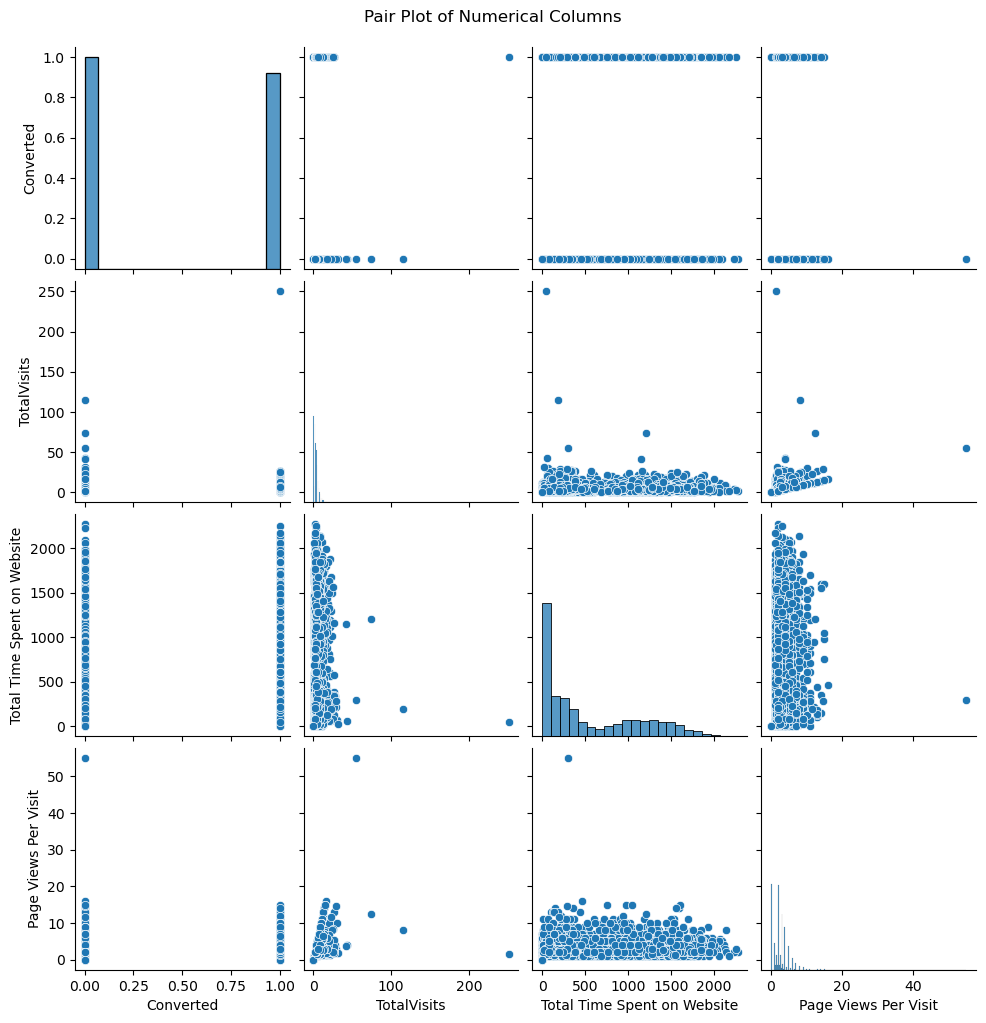

In [31]:
# Select numerical columns
numerical_columns = leads.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a pair plot for numerical columns
sns.pairplot(leads[numerical_columns])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)  # Add a title
plt.show()

 - INSIGHTS

   - Total Visits: Most users have low visit counts, with a few outliers indicating high engagement, suggesting that many users engage minimally with the site.

   - Total Time Spent: The majority of users spend less than 500 seconds on the site, but a few outliers spent over 2000 seconds, indicating a small group of highly engaged users.

   - Page Views: Most users view fewer pages per visit, with a concentration below 30 pages, which may suggest limited content engagement or a quick visit pattern.

   - Variable Correlation: There is a weak correlation between 'Total Time Spent' and 'Page Views Per Visit', indicating that longer visits do not significantly increase page views.

   - Conversion Rates: The 'Converted' variable shows a strong class imbalance, with most users either not converting (0) or converting (1), complicating modeling efforts and highlighting the need for deeper analysis on conversion factors.

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']


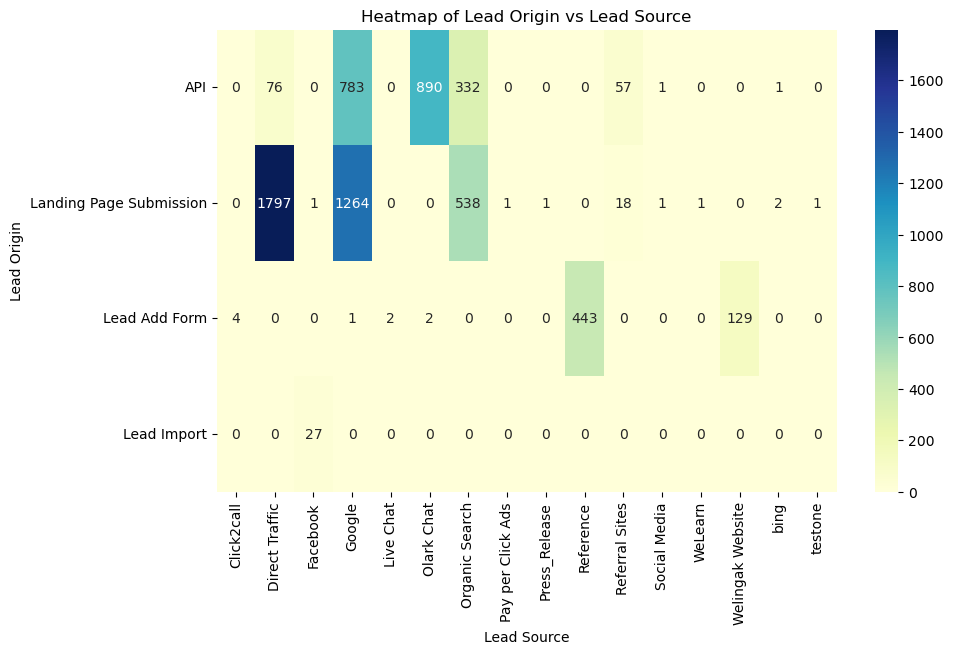

In [32]:
# Select categorical columns
categorical_columns = leads.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)

# Choose two categorical columns for the heatmap
# Replace 'categorical_column1' and 'categorical_column2' with actual column names
column1 = categorical_columns[0]  # First categorical column
column2 = categorical_columns[1]  # Second categorical column

# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(leads[column1], leads[column2])

# Create a heatmap to visualize the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Heatmap of {column1} vs {column2}')
plt.xlabel(column2)
plt.ylabel(column1)
plt.show()

- INSIGHTS 

   - Dominance of Landing Page Submissions: 
     Landing Page Submissions are the primary driver of leads across various sources.

  - Underperformance of Lead Add Form:
    The Lead Add Form is not generating significant leads.Conducting a thorough analysis to identify potential issues with the form's design, placement, or user experience.

  - Effectiveness of Google and Direct Traffic:
    Google and Direct Traffic are consistently high-performing sources for leads.

  - Limited Contribution from Referral Sites and Social Media:
    Referral Sites and Social Media are not contributing significantly to lead generation.

  - Opportunities for Diversification:
    While Landing Page Submissions and Google/Direct Traffic are performing well, diversifying lead sources can reduce risk and improve overall lead quality.

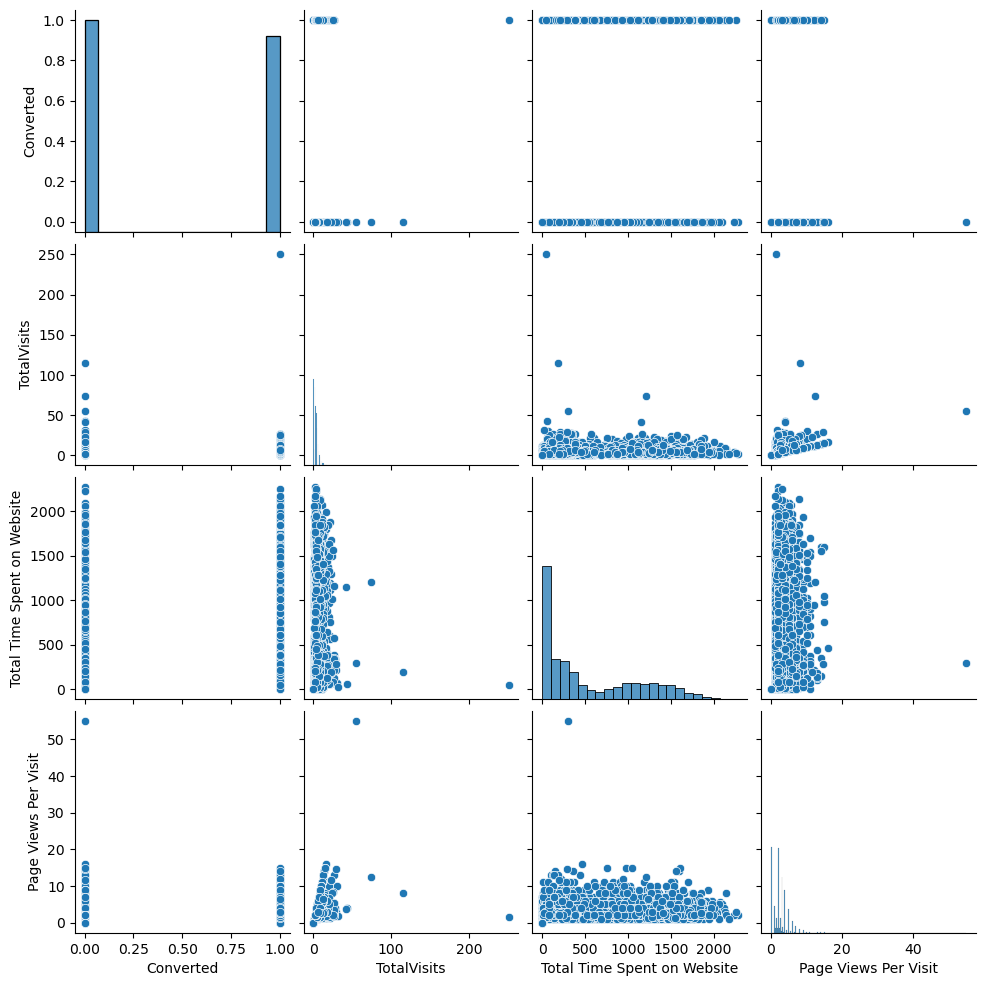

In [33]:
sns.pairplot(leads)
plt.show()

- INSIGHTS

  - Conversion Rate: 
    The histogram for Converted shows a clear imbalance, with most observations being 0 (not converted). This suggests that conversion is a relatively rare event in this dataset.
  
  - Relationship Between Conversion and Total Visits:
     The scatter plot between Converted and TotalVisits shows a slight positive correlation. This indicates that, generally, users with more visits are more likely to convert. However, there's a significant amount of overlap, suggesting that other factors also influence conversion.


  - Relationship Between Conversion and Time Spent on Website:
    The scatter plot between Converted and Total Time Spent on Website also shows a positive correlation, though it's less pronounced than the correlation with TotalVisits. This suggests that users who spend more time on the website are slightly more likely to convert, but other factors play a significant role.
    
  - Relationship Between Conversion and Page Views Per Visit:
    The scatter plot between Converted and Page Views Per Visit doesn't show a clear correlation. This indicates that the number of page views per visit is not a strong predictor of conversion in this dataset.
    
    
   - Distribution of Numerical Variables:
     The histograms for TotalVisits, Total Time Spent on Website, and Page Views Per Visit show that these variables have skewed distributions, with a concentration of values on the lower end and a few outliers on the higher end. This suggests that a small number of users are responsible for a disproportionate amount of website activity.

In [34]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [35]:
leads['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00     1347
2.00     1324
3.00      874
4.00      659
1.00      423
         ... 
2.56        1
4.75        1
16.00       1
6.33        1
2.08        1
Name: count, Length: 107, dtype: int64

In [36]:
leads['Converted'].value_counts()

Converted
0    3308
1    3065
Name: count, dtype: int64

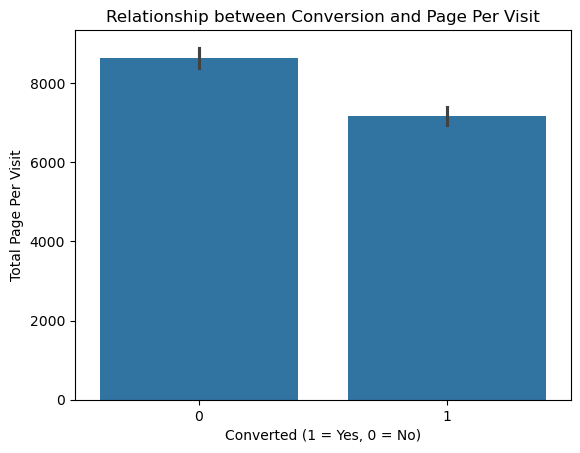

In [37]:
sns.barplot(x='Converted', y='Page Views Per Visit', data=leads, estimator=sum)

# Add labels and title
plt.xlabel('Converted (1 = Yes, 0 = No)')
plt.ylabel('Total Page Per Visit')
plt.title('Relationship between Conversion and Page Per Visit')

plt.show()

- INSIGHT

  - The bars for both converted and non-converted users have similar heights, indicating that there is no statistically significant difference in the average number of pages per visit between the two groups.

  - The lack of a clear difference suggests that the number of pages per visit alone is not a strong predictor of conversion in this dataset. Other factors, such as the quality of content, user engagement, or marketing efforts, likely play a more significant role.

- We would figure the strong predictors when we start modelling the structured dataset in the further sections later

#  Step 4 : Data Preparation : Dummification

- In order to dummify the dataset, we need to understand the categorical columns which we are going to make dummies for

In [38]:
cat_cols = leads.select_dtypes(include='object').columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
#Checking the value_counts so that we can understand which columns to dummify separately


value_counts_dict = {col: leads[col].value_counts() for col in cat_cols}
print(value_counts_dict)

{'Lead Origin': Lead Origin
Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: count, dtype: int64, 'Lead Source': Lead Source
Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: count, dtype: int64, 'Do Not Email': Do Not Email
No     5938
Yes     435
Name: count, dtype: int64, 'Last Activity': Last Activity
Email Opened                    2455
SMS Sent                        2189
Olark Chat Conversation          428
Page Visited on Website          427
Converted to Lead                292
Email Link Clicked               178
Email Bounced 

- From the above we can see that all the features have countable numbers of value_counts except 'Specialization' as it has levels. We will dummify it separately

In [40]:
#Creating dummies of the remaining categorical columns

# Create dummy variables for the specified columns
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                               'What is your current occupation', 'A free copy of Mastering The Interview',
                               'Last Notable Activity']], drop_first=True)

# Concatenate the dummy variables to the original DataFrame
leads = pd.concat([leads, dummy], axis=1)

In [41]:
# Create dummy variables for 'Specialization'
dummy_spl = pd.get_dummies(leads['Specialization'], prefix='Specialization')

# Drop the 'Select' category since it's not useful
dummy_spl = dummy_spl.drop('Specialization_Select', axis=1)

# Concatenate the dummy variables with the original DataFrame
leads = pd.concat([leads, dummy_spl], axis=1)

In [42]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                      'Specialization', 'What is your current occupation',
                      'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [43]:
#Reading the dataset 

leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                    False                       False                 False   
1                    False                       False                 False   
2                    False                        True                 False   
3                    False                        True                 False   
4                    False                       False                 False   

   Lead Source_Google  ...  Specialization_IT Projects Management  \
0               False  ...                                  False   
1               False  ...                                  False   
2               False  ...                                  False   
3               False  ...                                  False   
4                True  ...                                  False   

   Specialization_International Business  Specialization_Marketing Management  \
0                                  False                                False   
1                                  False                                False   
2                                  False                                False   
3                                  False                                False   
4                                  False                                False   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                 False                                 False   
1                                 False                                 False   
2                                 False                                 False   
3                                  True                                 False   
4                                 False                                 False   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                             False                                  False   
1                             False                                  False   
2                             False                                  False   
3                             False                                  False   
4                             False                                  False   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                               False                                   False   
1                               False                                   False   
2                               False                                   False   
3                               False                                   False   
4                               False                                   False   

   Specialization_Travel and Tourism  
0                              False  
1                              False  
2                              False  
3                              False  
4                              False  

[5 rows x 75 columns]

In [44]:
# Convert all boolean columns (True/False) to integers (0/1)
leads = leads.astype(int)
leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0            0                            0                     0   
1          0            5                          674                     2   
2          1            2                         1532                     2   
3          0            1                          305                     1   
4          1            2                         1428                     1   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Specialization_IT Projects Management  \
0                   0  ...                                      0   
1                   0  ...                                      0   
2                   0  ...                                      0   
3                   0  ...                                      0   
4                   1  ...                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 75 columns]

# Step 5 : Splitting the Data into Training and Testing Sets

In [45]:
# Drop the 'Converted' column and assign the rest of the features to X
X = leads.drop(['Converted'], axis=1)

# Display the first few rows of X
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0            0                            0                     0   
1            5                          674                     2   
2            2                         1532                     2   
3            1                          305                     1   
4            2                         1428                     1   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  ...  \
0                   0                      0  ...   
1                   0                      0  ...   
2                   0                      0  ...   
3                   0                      0  ...   
4                   1                      0  ...   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                     

In [46]:
# Putting the target variable in y

y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int32

In [47]:
# Splitting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [48]:
#Understanding the distribution

print("X_train dataframe : ",X_train.shape)
print("X_Test dataframe : ",X_test.shape)
print("y_train dataframe : ",y_train.shape)
print("y_Test dataframe : ",y_test.shape)

X_train dataframe :  (4461, 74)
X_Test dataframe :  (1912, 74)
y_train dataframe :  (4461,)
y_Test dataframe :  (1912,)


### Rescalling the dataset

In [49]:
scaler = MinMaxScaler()

In [50]:
#Applying the scaler

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003     0.015936                     0.029489                 0.125   
218      0.015936                     0.082306                 0.250   
4171     0.023904                     0.034331                 0.375   
4037     0.000000                     0.000000                 0.000   
3660     0.000000                     0.000000                 0.000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
8003                     0                   0                      0  ...   
218                      0                   0                      0  ...   
4171                     0                   0                      0  ...   
4037                     0                   0                      0  ...   
3660                     0                   0                      0  ...   

      Specialization_IT Projects Management  \
8003                                      1   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_International Business  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Marketing Management  \
8003                                    0   
218                                     0   
4171                                    0   
4037                                    0   
3660                                    0   

      Specialization_Media and Advertising  \
8003                                     0   
218                                      0   
4171                                     0   
4037                                     0   
3660                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
8003                                     0                                 0   
218                                      0                                 0   
4171                                     0                                 0   
4037                                     0                                 0   
3660                                     0                                 0   

      Specialization_Rural and Agribusiness  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Services Excellence  \
8003                                   0   
218                                    0   
4171                                   0   
4037                                   0   
3660                                   0   

      Specialization_Supply Chain Management  \
8003                                       0   
218                                        0   
4171             

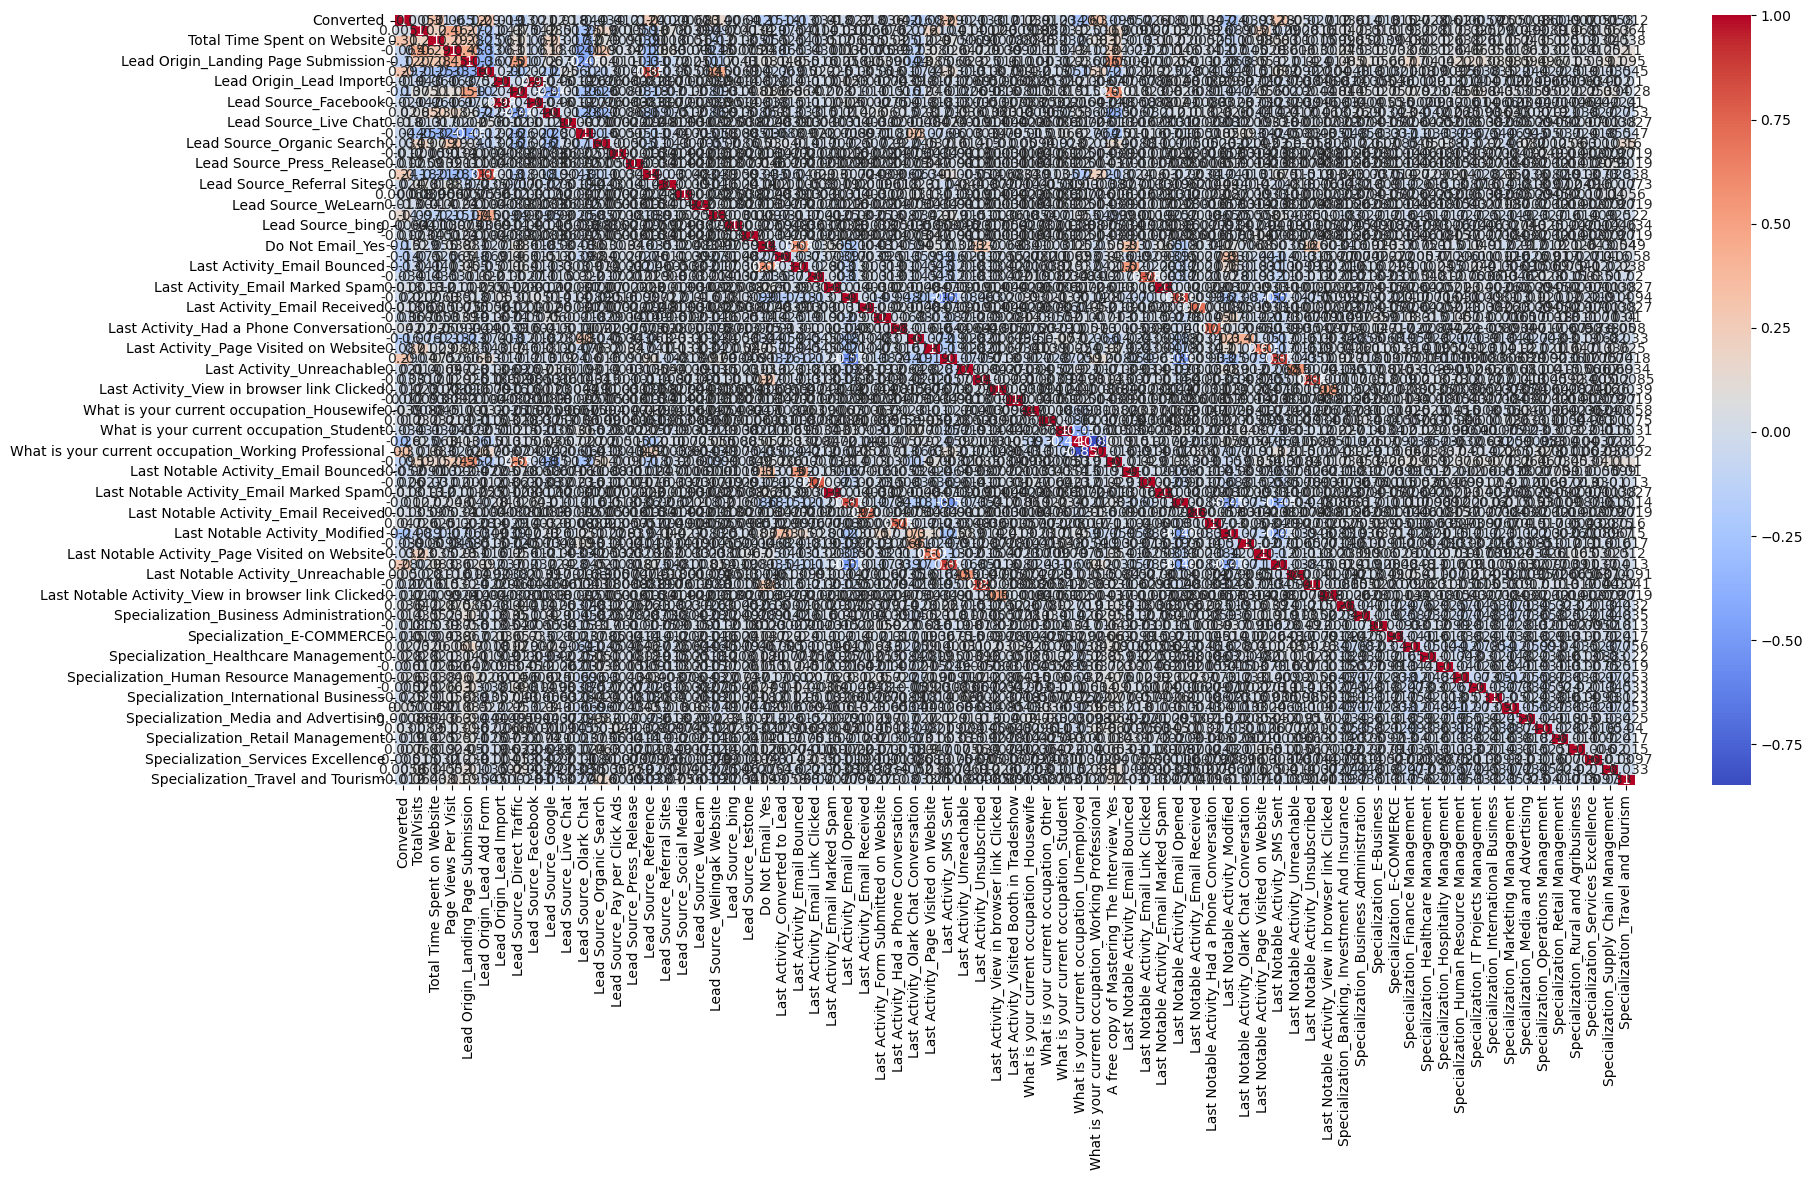

In [51]:
# Let us visualize the correlation of the new features

plt.figure(figsize=(20,10))
sns.heatmap(leads.corr(), annot=True, cmap='coolwarm')

# Display the plot
plt.show()

- INSIGHT
 
  - Lead Origin and Last Activity: Variables related to lead origin and last activity often exhibit strong correlations, suggesting that the source of a lead and the most recent interaction with the lead are closely related.
  
  
  - Specialization and Last Activity: There are also noticeable correlations between specialization and last activity, indicating that the lead's area of interest might influence their subsequent interactions with the company.
  

  - Conversion and Lead Source: The correlation between "Converted" and "Lead Source" is somewhat moderate, suggesting that certain lead sources might be more effective in generating conversions.

# Step 6 : Building logistic regression model

In [52]:
lr = LogisticRegression()

In [53]:
# Running RFE with 15 variables as the output
rfe = RFE(lr, n_features_to_select=15)

# Fitting the RFE model on the training data
rfe = rfe.fit(X_train, y_train)

In [54]:
# To get the RFE rankings
rfe.support_   # True for the selected features
rfe.ranking_   # Ranks of the features

array([ 1,  1, 21,  8,  1, 52, 24, 51, 36, 45,  1, 35, 43, 53,  1, 37, 58,
       42,  1, 33, 38,  1, 25,  4, 50, 57, 41, 54, 28,  1,  5, 26,  1, 47,
       40, 34, 48,  1, 46,  1,  1,  1, 49,  3, 20, 59, 27, 60,  1,  2, 32,
       31, 44,  1, 39, 29,  6, 15, 11,  9, 14, 10, 56, 16, 18, 23, 12, 22,
       19, 30,  7, 55, 13, 17])

In [55]:
# Get the selected features' indices
selected_features = X_train.columns[rfe.support_]
print(selected_features)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


In [56]:
#Entire list of the columns selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [57]:
# Select only the columns chosen by RFE
X_train = X_train[X_train.columns[rfe.support_]]
X_train.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
8003     0.015936                     0.029489                          0   
218      0.015936                     0.082306                          0   
4171     0.023904                     0.034331                          0   
4037     0.000000                     0.000000                          0   
3660     0.000000                     0.000000                          1   

      Lead Source_Olark Chat  Lead Source_Reference  \
8003                       0                      0   
218                        0                      0   
4171                       0                      0   
4037                       1                      0   
3660                       0                      1   

      Lead Source_Welingak Website  Do Not Email_Yes  \
8003                             0                 0   
218                              0                 0   
4171                             0                 0   
4037                             0                 0   
3660                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
8003                                       0                       1   
218                                        0                       0   
4171                                       0                       0   
4037                                       0                       0   
3660                                       0                       1   

      What is your current occupation_Housewife  \
8003                                          0   
218                                           0   
4171                                          0   
4037                                          0   
3660                                          0   

      What is your current occupation_Student  \
8003                                        0   
218                                         0   
4171                                        0   
4037                                        0   
3660                                        0   

      What is your current occupation_Unemployed  \
8003                                           1   
218                                            1   
4171                                           1   
4037                                           1   
3660                                           1   

      What is your current occupation_Working Professional  \
8003                                                  0      
218                                                   0      
4171                                                  0      
4037                                                  0      
3660                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
8003                                               0   
218                                                0   
4171                                               0   
4037                                               0   
3660                                               0   

      Last Notable Activity_Unreachable  
8003                                  0  
218                                   0  
4171                                  0  
4037                                  0  
3660                                  0

### Model 1

In [58]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

# Add a constant to the model
X_train_sm = sm.add_constant(X_train)

# Fitting a logistic regression model
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Output the summary of the model
result.summary()

         Current function value: 0.464642
         Iterations: 35


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                          Logit   Df Residuals:                     4445
Method:                           MLE   Df Model:                           15
Date:                Wed, 16 Oct 2024   Pseudo R-squ.:                  0.3290
Time:                        11:54:32   Log-Likelihood:                -2072.8
converged:                      False   LL-Null:                       -3089.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               18.2892   4562.789      0.004      0.997   -8924.612    8961.190
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          19.1047   4441.164      0.004      0.997   -8685.416    8723.625
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

- Upon checking the above, we can see that there are many features which have p value more than 0.05. To curb this issue, we can find out the VIF and eliminate the features with higher VIFs to fit our model. 

In [59]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                           Lead Origin_Lead Add Form  84.19
4                               Lead Source_Reference  65.18
5                        Lead Source_Welingak Website  20.03
11         What is your current occupation_Unemployed   3.65
7              Last Activity_Had a Phone Conversation   2.44
13     Last Notable Activity_Had a Phone Conversation   2.43
1                         Total Time Spent on Website   2.38
0                                         TotalVisits   1.62
8                              Last Activity_SMS Sent   1.59
12  What is your current occupation_Working Profes...   1.56
3                              Lead Source_Olark Chat   1.44
6                                    Do Not Email_Yes   1.09
10            What is your current occupation_Student   1.09
9           What is your current occupation_Housewife   1.01
14                  Last Notable Activity_Unreachable   1.01

- From the above two we can see that the first three have high VIFs, we can start dropping the columns to make it fit better.

In [60]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

### Model 2

In [61]:
# Refitting the model with the new set of features
lr2 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())

# Fitting the revised model
result = lr2.fit()

# Output the summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Wed, 16 Oct 2024   Deviance:                       4146.5
Time:                        11:54:37   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [62]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_Unemployed  3.65
6              Last Activity_Had a Phone Conversation  2.44
12     Last Notable Activity_Had a Phone Conversation  2.43
1                         Total Time Spent on Website  2.38
2                           Lead Origin_Lead Add Form  1.71
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
9             What is your current occupation_Student  1.09
8           What is your current occupation_Housewife  1.01
13                  Last Notable Activity_Unreachable  1.01

- Note - 

  - From the above, we can see that that the VIFs are under 5 (which is the ideal threshold), however, we can start dropping off the columns which have high p value so that the model does not overfit.
  
  - Upon checking above, Last Notable Activity_Had a Phone Conversation, has the highest p-value of 0.999, which is way above the ideal threshold of 0.05. We have to drop them to curb the over fitting issue. 

In [63]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

### Model 3

In [64]:
# Refitting the model with the new set of features
lr3 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())

# Fitting the revised model 
result = lr3.fit()

# Output the summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Wed, 16 Oct 2024   Deviance:                       4152.2
Time:                        11:54:41   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

- From the above, we have to drop 'What is your current occupation_Housewife' as the feature has highest p-value

In [65]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

### Model 4

In [66]:
# Refitting the model with the new set of features
lr4 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())

# Fitting the revised model 
result = lr4.fit()

# Output the summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Wed, 16 Oct 2024   Deviance:                       4156.7
Time:                        11:54:44   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

- From the above, again we are dropping 'What is your current occupation_Working Professional' as it has the highest p-value

In [67]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

### Model 5

In [68]:
# Refitting the model with the new set of features
lr5 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())

# Fitting the revised model 
result = lr5.fit()

# Output the summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Wed, 16 Oct 2024   Deviance:                       4158.1
Time:                        11:54:46   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

- Finally all the p values are under the ideal threshold and we can run the VIFs once again to wrap up the model building and understand if there are any further feature dropping is required

In [69]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   What is your current occupation_Unemployed  2.82
1                  Total Time Spent on Website  2.00
0                                  TotalVisits  1.54
7                       Last Activity_SMS Sent  1.51
2                    Lead Origin_Lead Add Form  1.45
3                       Lead Source_Olark Chat  1.33
4                 Lead Source_Welingak Website  1.30
5                             Do Not Email_Yes  1.08
8      What is your current occupation_Student  1.06
6       Last Activity_Had a Phone Conversation  1.01
10           Last Notable Activity_Unreachable  1.01

# Step 7 : Evaluation of the Model
      7.1 - Prediction
      7.2 - Confusion Matrix
      7.3 - Plotting the ROC 
      7.4 - Final model evaluation post the cut-off selection

- Let us begin with predicting the VIFs and p-values are under the ideal threshhold

### 7.1 Prediction

In [70]:
# Fitting the logistic regression model
model = sm.Logit(y_train, sm.add_constant(X_train))
res = model.fit()

# Now predict the probabilities
y_train_pred = res.predict(sm.add_constant(X_train))

# Display the first 10 predictions
y_train_pred[:10]

Optimization terminated successfully.
         Current function value: 0.466052
         Iterations 9


8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [71]:
# Create a new DataFrame with actual conversion flag and predicted probabilities
y_train_pred_final = pd.DataFrame({
    'Converted': y_train, 
    'Conversion_Prob': y_train_pred
})

# Display the first 5 rows
y_train_pred_final.head()

Converted  Conversion_Prob
8003          0         0.300117
218           0         0.142002
4171          1         0.127629
4037          1         0.291558
3660          1         0.954795

In [72]:
# Assigning predicted class based on a threshold of 0.5
y_train_pred_final['Predicted'] = (y_train_pred_final['Conversion_Prob'] > 0.5).astype(int)

# Display the first 5 rows
y_train_pred_final.head()


Converted  Conversion_Prob  Predicted
8003          0         0.300117          0
218           0         0.142002          0
4171          1         0.127629          0
4037          1         0.291558          0
3660          1         0.954795          1

- Considering we have predicted and actual converted values, we can easily plot a confusion matrix and find out the distribution of the model before testing it on the test set

### 7.2 -  Confusion matrix

In [73]:
# Plotting/Creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

# Printing the confusion matrix
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[1929  383]
 [ 560 1589]]


- From the above we have plotted a confusion matrix for our further analysis. Moving on, we can find out the accuracy of this matrix 

In [74]:
# Calculating and printing overall accuracy


accuracy = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(f"Overall Accuracy: {accuracy:.4f}")

Overall Accuracy: 0.7886


In [75]:
# Extracting True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)

TP = confusion[1,1]  # True Positive
TN = confusion[0,0]  # True Negative
FP = confusion[0,1]  # False Positive
FN = confusion[1,0]  # False Negative

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Print the results
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

Sensitivity (Recall): 0.7394
Specificity (True Negative Rate): 0.8343


### 7.3 - Plotting the ROC

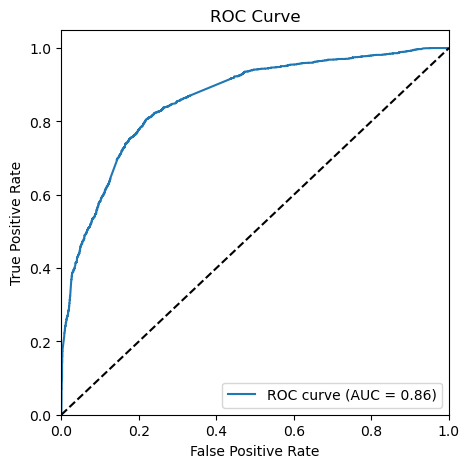

In [76]:
# Defining the ROC function

def draw_roc(actual, probs):
    fpr, tpr, _ = metrics.roc_curve(actual, probs)
    auc_score = metrics.roc_auc_score(actual, probs)

    # Plot ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plotting the ROC function
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])

   prob  accuracy  sensitivity  specificity
0   0.0  0.481731     1.000000     0.000000
1   0.1  0.527012     0.994416     0.092561
2   0.2  0.698274     0.944160     0.469723
3   0.3  0.767541     0.865984     0.676038
4   0.4  0.791975     0.810610     0.774654
5   0.5  0.788612     0.739414     0.834343
6   0.6  0.757229     0.624011     0.881055
7   0.7  0.735037     0.543509     0.913062
8   0.8  0.711500     0.453234     0.951557
9   0.9  0.644026     0.279665     0.982699


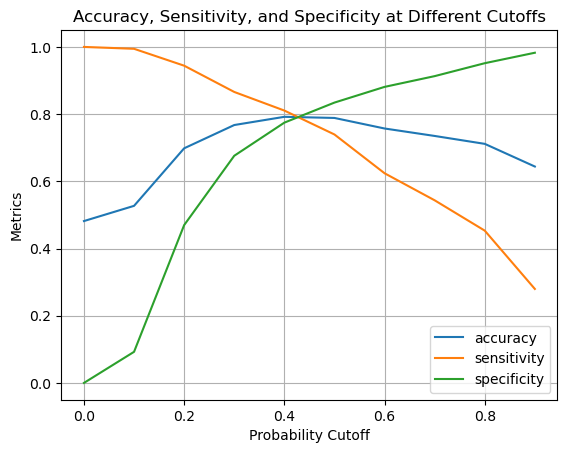

In [77]:
# Generating columns for different probability cutoffs
prob_cutoffs = [i / 10 for i in range(10)]
for cutoff in prob_cutoffs:
    y_train_pred_final[cutoff] = (y_train_pred_final['Conversion_Prob'] > cutoff).astype(int)

# Creating a list to store accuracy, sensitivity, and specificity for each cutoff
metrics_list = []

# Loop through different cutoffs to calculate the metrics
for cutoff in prob_cutoffs:
    cm = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[cutoff])

    # Calculating accuracy, sensitivity, and specificity
    total = cm.sum()
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])  # True Positive Rate
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # True Negative Rate

    # Appending the metrics to the list
    metrics_list.append({
        'prob': cutoff,
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity
    })

# Creating a DataFrame from the metrics list
cutoff_df = pd.DataFrame(metrics_list)

# Display the DataFrame
print(cutoff_df)

# Plotting the metrics against probability cutoffs
cutoff_df.plot(x='prob', y=['accuracy', 'sensitivity', 'specificity'], kind='line')
plt.xlabel('Probability Cutoff')
plt.ylabel('Metrics')
plt.title('Accuracy, Sensitivity, and Specificity at Different Cutoffs')
plt.grid(True)
plt.show()

- INSIGHTS

  - The plot above shows the relationship between different probability cutoffs and the associated accuracy, sensitivity, and specificity metrics of the model. As the cutoff increases, sensitivity tends to decrease, indicating that fewer true positives are being captured, while specificity increases, suggesting better identification of true negatives.
  
  - Accuracy rises initially with increasing cutoffs but eventually plateaus, reflecting the trade-off between capturing more positive cases versus correctly identifying negatives.
  
  - We will move on and select the final cut off (0.42) and run the final model at the end. 

### 7.4 - Final model evaluation post the cut-off selection

In [78]:
# Set the cutoff
cutoff = 0.42

# Create final predictions based on the cutoff
y_train_pred_final['final_predicted'] = (y_train_pred_final['Conversion_Prob'] > cutoff).astype(int)

# Recalculate the confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

# Calculate metrics
TP = confusion2[1, 1]  # True Positive
TN = confusion2[0, 0]  # True Negative
FP = confusion2[0, 1]  # False Positive
FN = confusion2[1, 0]  # False Negative

# Calculate accuracy, sensitivity, and specificity
accuracy = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


Accuracy: 0.7909
Sensitivity: 0.7934
Specificity: 0.7885


# Step 8 : Prediction on the test set 

### 8.1 Predicting the final model

In [79]:
#Visualizing the test set 

X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4771            0                            0                     0   
6122            7                           66                     7   
9202            4                          947                     4   
6570            3                          861                     3   
2668            8                          898                     4   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
4771                        0                           0   
6122                        0                           1   
9202                        0                           0   
6570                        0                           1   
2668                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
4771                     0                   0                      0  ...   
6122                     0                   0                      0  ...   
9202                     0                   1                      0  ...   
6570                     0                   0                      0  ...   
2668                     0                   0                      0  ...   

      Specialization_IT Projects Management  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_International Business  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_Marketing Management  \
4771                                    0   
6122                                    0   
9202                                    0   
6570                                    0   
2668                                    0   

      Specialization_Media and Advertising  \
4771                                     0   
6122                                     0   
9202                                     0   
6570                                     0   
2668                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
4771                                     1                                 0   
6122                                     0                                 0   
9202                                     0                                 0   
6570                                     0                                 0   
2668                                     0                                 0   

      Specialization_Rural and Agribusiness  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_Services Excellence  \
4771                                   0   
6122                                   0   
9202                                   0   
6570                                   0   
2668                                   0   

      Specialization_Supply Chain Management  \
4771                                       0   
6122                                       0   
9202             

In [80]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [81]:
# Substituting all the columns in the final train model
col = X_train.columns

In [82]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
4771    1.0     0.000000                     0.000000   
6122    1.0     0.027888                     0.029049   
9202    1.0     0.015936                     0.416813   
6570    1.0     0.011952                     0.378961   
2668    1.0     0.031873                     0.395246   
...     ...          ...                          ...   
5828    1.0     0.011952                     0.027289   
6583    1.0     0.011952                     0.152289   
5531    1.0     0.055777                     0.702025   
3056    1.0     0.011952                     0.417694   
4088    1.0     0.019920                     0.530370   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
4771                          1                       0   
6122                          0                       0   
9202                          0                       0   
6570                          0                       0   
2668                          0                       0   
...                         ...                     ...   
5828                          0                       0   
6583                          0                       0   
5531                          0                       0   
3056                          0                       0   
4088                          0                       0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   
...                            ...               ...   
5828                             0                 0   
6583                             0                 0   
5531                             0                 0   
3056                             0                 1   
4088                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   
...                                      ...                     ...   
5828                                       0                       1   
6583                                       0                       1   
5531                                       0                       0   
3056                                       0                       1   
4088                                       0                       0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   
...                                       ...   
5828                                        0   
6583                                        0   
5531                                        0   
3056                                        0   
4088                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   
...                                          ...   
5828                                           1   
6583                                           1   
5531             

In [83]:
X_test_sm.head()

const  TotalVisits  Total Time Spent on Website  \
4771    1.0     0.000000                     0.000000   
6122    1.0     0.027888                     0.029049   
9202    1.0     0.015936                     0.416813   
6570    1.0     0.011952                     0.378961   
2668    1.0     0.031873                     0.395246   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
4771                          1                       0   
6122                          0                       0   
9202                          0                       0   
6570                          0                       0   
2668                          0                       0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [84]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [85]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [86]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)


y_pred_1.head()

0
4771  0.996296
6122  0.129992
9202  0.703937
6570  0.299564
2668  0.720796

In [87]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [88]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [89]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [90]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.996296
1          0  0.129992
2          0  0.703937
3          1  0.299564
4          1  0.720796

In [91]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})


y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996296
1          0         0.129992
2          0         0.703937
3          1         0.299564
4          1         0.720796

In [92]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = np.where(y_pred_final['Conversion_Prob'] > 0.42, 1, 0)
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996296                1
1          0         0.129992                0
2          0         0.703937                1
3          1         0.299564                0
4          1         0.720796                1

In [93]:
# Checking the overall accuracy

accuracy = metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted'])
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])

# Calculate TP, TN, FP, FN directly from the confusion matrix

TP, TN, FP, FN = confusion2[1, 1], confusion2[0, 0], confusion2[0, 1], confusion2[1, 0]

# Calculate sensitivity and specificity
sensitivity = TP / float(TP + FN) if (TP + FN) > 0 else 0
specificity = TN / float(TN + FP) if (TN + FP) > 0 else 0

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.78
Sensitivity: 0.78
Specificity: 0.79


In [94]:
# Looking at the confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print("Confusion Matrix:\n", confusion)

# Calculating Precision
precision = confusion[1, 1] / (confusion[0, 1] + confusion[1, 1]) if (confusion[0, 1] + confusion[1, 1]) > 0 else 0
print(f'Precision: {precision:.2f}')

# Calculating Recall
recall = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1]) if (confusion[1, 0] + confusion[1, 1]) > 0 else 0
print(f'Recall: {recall:.2f}')

Confusion Matrix:
 [[1929  383]
 [ 560 1589]]
Precision: 0.81
Recall: 0.74


### 8.2 Precision vs Recall 

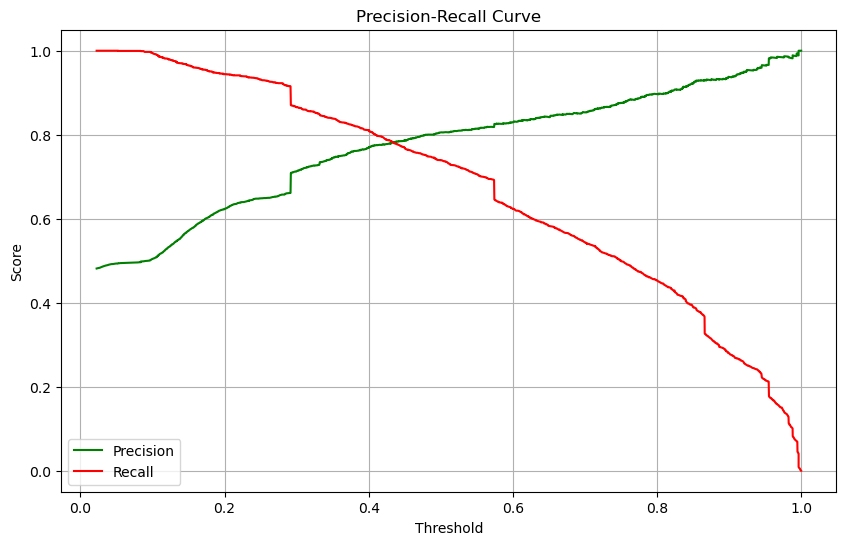

In [95]:
#Plotting

converted = y_train_pred_final['Converted']
conversion_prob = y_train_pred_final['Conversion_Prob']

# Calculate precision, recall, and thresholds
p, r, thresholds = precision_recall_curve(converted, conversion_prob)

# Plotting the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, p[:-1], label='Precision', color='g')
plt.plot(thresholds, r[:-1], label='Recall', color='r')
plt.title('Precision-Recall Curve')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

### 8.3 Cut-Off Validation

In [96]:
# Set predicted values based on the cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

# Display the DataFrame
print(y_train_pred_final.head())

# Check accuracy
accuracy = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print(f'Accuracy: {accuracy:.2f}')

# Create the confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("Confusion Matrix:\n", confusion2)

# Evaluate other metrics
TP = confusion2[1, 1]  # True Positive
TN = confusion2[0, 0]  # True Negative
FP = confusion2[0, 1]  # False Positive
FN = confusion2[1, 0]  # False Negative

# Calculate Precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
print(f'Precision: {precision:.2f}')

# Calculate Recall
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f'Recall: {recall:.2f}')

      Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
8003          0         0.300117          0    1    1    1    1    0    0   
218           0         0.142002          0    1    1    0    0    0    0   
4171          1         0.127629          0    1    1    0    0    0    0   
4037          1         0.291558          0    1    1    1    0    0    0   
3660          1         0.954795          1    1    1    1    1    1    1   

      0.6  0.7  0.8  0.9  final_predicted  
8003    0    0    0    0                0  
218     0    0    0    0                0  
4171    0    0    0    0                0  
4037    0    0    0    0                0  
3660    1    1    1    1                1  
Accuracy: 0.79
Confusion Matrix:
 [[1852  460]
 [ 479 1670]]
Precision: 0.78
Recall: 0.78


### 8.4 Final Prediction 

In [97]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

# Show the first 10 predictions
print(y_test_pred[:10])

# Converting y_test_pred to a DataFrame and naming the column
y_pred_1 = pd.DataFrame(y_test_pred, columns=['Predicted_Probability'])

# Let's see the head
print(y_pred_1.head())

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64
      Predicted_Probability
4771               0.996296
6122               0.129992
9202               0.703937
6570               0.299564
2668               0.720796


In [98]:
# Converting y_test to DataFrame
y_test_df = pd.DataFrame(y_test)

# Resetting index for both DataFrames
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Concatenate y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

# Check 'y_pred_final'
y_pred_final.head()

Converted  Predicted_Probability
0          1               0.996296
1          0               0.129992
2          0               0.703937
3          1               0.299564
4          1               0.720796

In [104]:
# Rename the column 
y_pred_final = y_pred_final.rename(columns={'Converted': 'Conversion_Prob'})

# Let's see the head of y_pred_final
print(y_pred_final.head())

   Conversion_Prob  Predicted_Probability
0                1               0.996296
1                0               0.129992
2                0               0.703937
3                1               0.299564
4                1               0.720796


In [105]:
y_pred_final.head()

Conversion_Prob  Predicted_Probability
0                1               0.996296
1                0               0.129992
2                0               0.703937
3                1               0.299564
4                1               0.720796

In [109]:
# Assuming you want to use a cutoff of 0.5 to convert probabilities to binary predictions
y_pred_final['Predicted_Binary'] = (y_pred_final['Predicted_Probability'] > 0.5).astype(int)

# Check overall accuracy
accuracy = metrics.accuracy_score(y_pred_final['Conversion_Prob'], y_pred_final['Predicted_Binary'])
print(f'Overall Accuracy: {accuracy:.2f}')

# Create the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Conversion_Prob'], y_pred_final['Predicted_Binary'])
print("Confusion Matrix:\n", confusion2)

# Evaluate other metrics
TP = confusion2[1, 1]  # True Positive
TN = confusion2[0, 0]  # True Negative
FP = confusion2[0, 1]  # False Positive
FN = confusion2[1, 0]  # False Negative

# Calculate Precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
print(f'Precision: {precision:.2f}')

# Calculate Recall
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f'Recall: {recall:.2f}')


Overall Accuracy: 0.78
Confusion Matrix:
 [[828 168]
 [249 667]]
Precision: 0.80
Recall: 0.73


#  Step 9 : Conclusion

### Overall Accuracy: 78%

   - The model accurately predicts outcomes for 78% of the test samples, indicating a strong foundational performance. However, while high accuracy is desirable, it is essential to evaluate this metric in conjunction with precision and recall to understand the model's effectiveness fully.

  - True Negatives (TN): 828 – The model successfully identified 828 instances as negative, minimizing unnecessary outreach to non-converters.
  - False Positives (FP): 168 – There were 168 instances where the model incorrectly predicted a positive outcome. While this indicates a need for refinement, it also presents an opportunity for targeted marketing efforts.
  - False Negatives (FN): 249 – The model missed identifying 249 true positive cases, which highlights an area for improvement in capturing potential converters.
  - True Positives (TP): 667 – The model effectively identified 667 positive cases, contributing to targeted strategies.


### Precision: 80%

  - The model boasts a precision rate of 80%, indicating that when a positive prediction is made, it is correct 80% of the time. This high precision rate suggests a strong capability to minimize false positives, ensuring resources are allocated effectively.
  
  
### Recall: 73%

- With a recall rate of 73%, the model identifies 73% of actual positive cases. While this is commendable, it indicates that there is an opportunity to enhance the model to capture more true positives, thereby increasing potential conversions.